<a href="https://colab.research.google.com/github/Soyasauce-53/Machine-Learning-Projects/blob/main/Stock_Price_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
import yfinance as yf
import datetime as dt

stock = "POWERGRID.NS"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2024, 11, 1)

df = yf.download(stock, start, end)

/tmp/ipython-input-2487901451.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2007-10-05,31.768667,34.579216,26.258098,28.358115,855215656
2007-10-08,30.142351,32.842373,29.952875,32.842373,126671715
2007-10-09,32.194981,32.479192,28.531795,30.158122,116725709
2007-10-10,32.494987,33.158151,32.210776,33.031833,67931378
2007-10-11,36.126598,37.895034,32.210780,37.895034,106320954


In [ ]:
df.shape

(4208, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4208 entries, 2007-10-05 to 2024-10-31
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4208 non-null   float64
 1   (High, POWERGRID.NS)    4208 non-null   float64
 2   (Low, POWERGRID.NS)     4208 non-null   float64
 3   (Open, POWERGRID.NS)    4208 non-null   float64
 4   (Volume, POWERGRID.NS)  4208 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 197.2 KB


In [ ]:
df.isnull().sum()

,,0
Price,Ticker,
Close,POWERGRID.NS,0
High,POWERGRID.NS,0
Low,POWERGRID.NS,0
Open,POWERGRID.NS,0
Volume,POWERGRID.NS,0


In [ ]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4208.000000,4208.000000,4208.000000,4208.000000,4.208000e+03
mean,78.234866,79.251475,77.230399,78.271021,1.188963e+07
std,63.502199,64.244906,62.711075,63.483856,2.061999e+07
min,18.548225,19.827413,16.629444,19.731474,0.000000e+00
25%,35.657289,36.219836,35.130677,35.693804,4.799653e+06
50%,54.180204,54.805797,53.455129,54.284227,8.344398e+06
75%,81.129339,82.097726,80.167319,81.151393,1.362032e+07
max,354.580750,355.356950,346.576122,353.222365,8.552157e+08


In [ ]:
df = df.reset_index()

In [ ]:
df.columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [ ]:
df.to_csv("powergrid.csv")

In [ ]:
data01 = pd.read_csv("powergrid.csv")

In [ ]:
data01.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,2007-10-05,31.768667221069336,34.57921595595695,26.258097754841593,28.358114831039718,855215656
2,1,2007-10-08,30.142351150512695,32.84237287538882,29.952875115166492,32.84237287538882,126671715
3,2,2007-10-09,32.19498062133789,32.47919237121999,28.531795058412545,30.15812189464917,116725709
4,3,2007-10-10,32.49498748779297,33.15815119704603,32.21077569331334,33.031833178254736,67931378


In [ ]:
# Candlesticks
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = data01['Date'], open = data01['Open'],
                                    high = data01['High'],
                                    low = data01['Low'],
                                    close = data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [ ]:
df = df.drop(['Date'], axis = 1)

/tmp/ipython-input-1002300862.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [ ]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,31.768667,34.579216,26.258098,28.358115,855215656
1,30.142351,32.842373,29.952875,32.842373,126671715
2,32.194981,32.479192,28.531795,30.158122,116725709
3,32.494987,33.158151,32.210776,33.031833,67931378
4,36.126598,37.895034,32.210780,37.895034,106320954


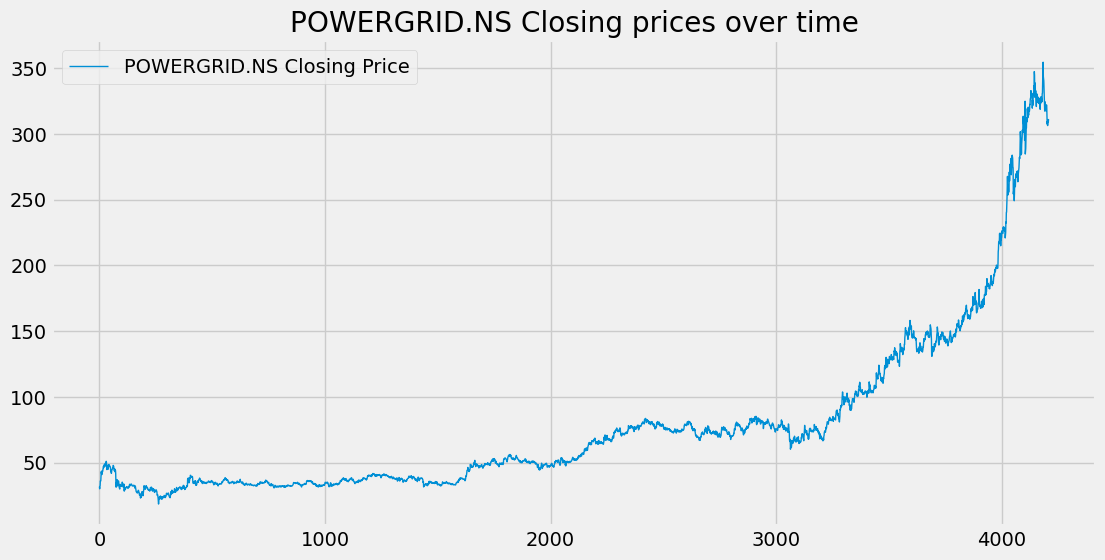

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Closing prices over time')
plt.legend()
plt.show()

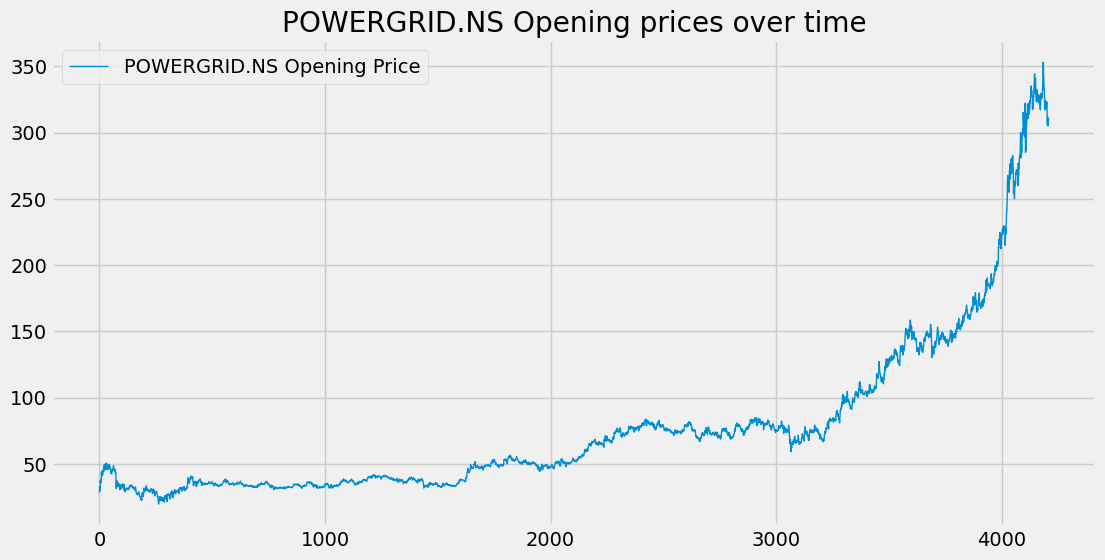

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 1)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()

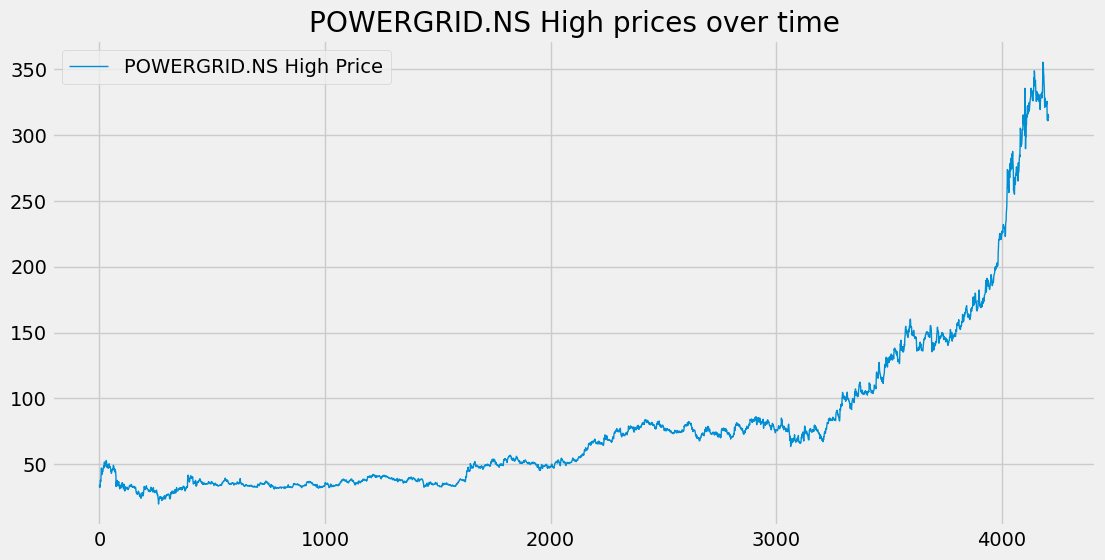

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 1)
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()

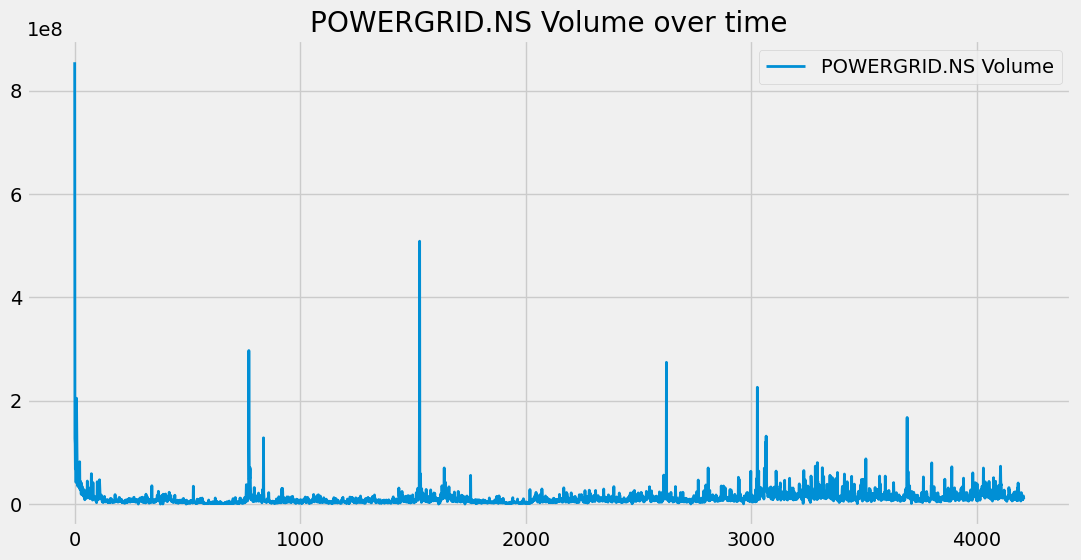

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label = f'{stock} Volume', linewidth = 2)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()

In [ ]:
# Moving Average
# [10, 20, 30, 40, 50, 60, 70, 80, 90]
# moving average for last 5 days -> null null null null 30.0 40.0 50.0

temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90]
print(sum(temp_data[2:7])/5)

50.0


In [ ]:
import pandas as pd
df01 = pd.DataFrame(temp_data)

In [ ]:
df01.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0


In [ ]:
ma100 = df.Close.rolling(100).mean()

In [ ]:
ma100

Ticker,POWERGRID.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4203,323.594430
4204,323.834960
4205,324.069897
4206,324.268581


In [ ]:
ma200 = df.Close.rolling(200).mean()

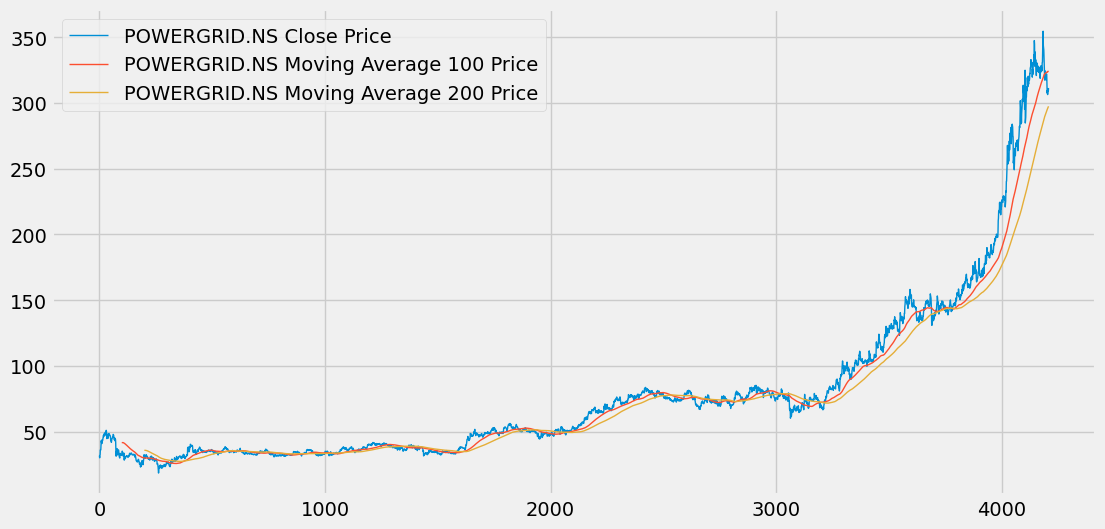

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(ma200, label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [ ]:
ema100 = df.Close.ewm(span=100, adjust = False).mean()

In [ ]:
ema200 = df['Close'].ewm(span=200, adjust = False).mean()

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [ ]:
# Training & Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [ ]:
data_training.shape

(2945, 1)

In [ ]:
data_testing.shape

(1263, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)

In [ ]:
data_training_array

array([[0.19808607],
       [0.17371821],
       [0.20447369],
       ...,
       [0.90774413],
       [0.86000381],
       [0.87299635]])

In [ ]:
data_training_array.shape[0]

2945

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train  = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(2845, 100, 1)

In [ ]:
# Model Building
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

LSTM Input -> 3D Array (batch_size, time_steps, seq_len)
LSTM 2D OR 3D
2D -> (batch_sizem units)
3D -> (batch_size, time_steps, units)

In [ ]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 29s 254ms/step - loss: 0.0910
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 41s 255ms/step - loss: 0.0091
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 23s 259ms/step - loss: 0.0071
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 41s 257ms/step - loss: 0.0066
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 22s 242ms/step - loss: 0.0078
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 23s 256ms/step - loss: 0.0060
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 23s 256ms/step - loss: 0.0062
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 23s 257ms/step - loss: 0.0054
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 22s 245ms/step - loss: 0.0047
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 23s 253ms/step - loss: 0.0043
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 24s 272ms/step - loss: 0.0041
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 23s 258ms/step - loss: 0.0042
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 23s 257ms/step - loss: 0.0039
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 22s 250ms/step - loss: 0.0044
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 42s 

In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
past_100_days = data_training.tail(100)
# The frame.append method is deprecated, use pandas.concat instead.
# final_df = past_100_days.append(data_testing, ignore_index = True)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [ ]:
final_df.head()

Ticker,POWERGRID.NS
0,74.289238
1,75.803719
2,76.062767
3,75.903351
4,76.341759


In [ ]:
input_data = scaler.fit_transform(final_df)

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [ ]:
x_test.shape

(1263, 100, 1)

In [ ]:
y_predicted = model.predict(x_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step


In [ ]:
y_predicted.shape

(1263, 1)

In [ ]:
scaler.scale_

array([0.00339787])

In [ ]:
scaler_factor = 1 / 0.0035166
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

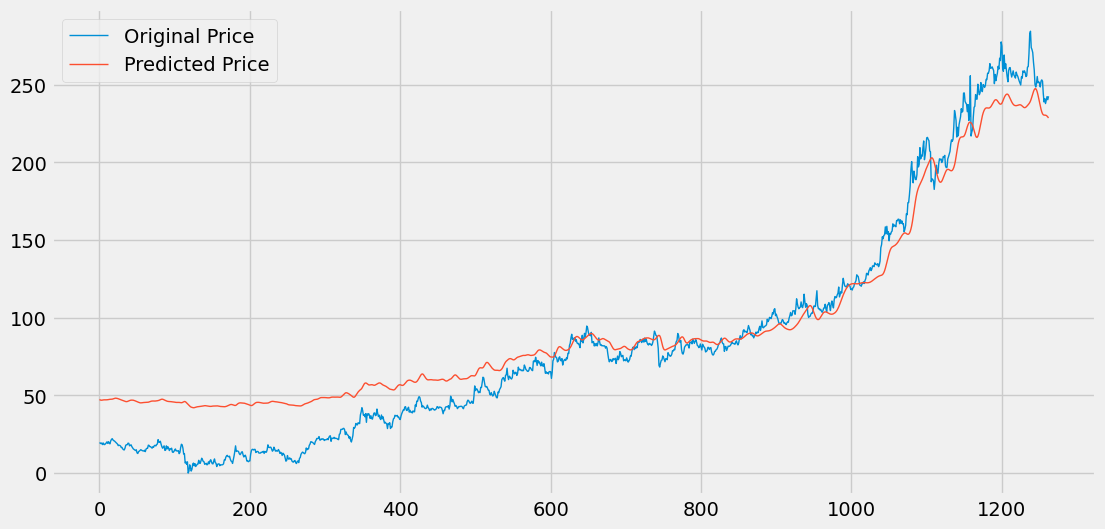

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()

In [ ]:
model.save('stock_dl_model.keras')

In [ ]:
!pip install gradio --quiet
import gradio as gr

In [ ]:
import io
import base64
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model


def predict_stock(stock_symbol):
    # Define start and end dates for fetching data
    start = dt.datetime(2000, 1, 1)
    end = dt.datetime(2024, 11, 1)

    # Fetch stock data
    try:
        df = yf.download(stock_symbol, start, end)
    except Exception as e:
        return f"Error fetching data for {stock_symbol}: {e}", None

    if df.empty:
        return f"No data found for {stock_symbol}", None

    # Preprocessing steps (similar to the notebook)
    df = df.reset_index()
    # Handle MultiIndex if it exists after reset (check if 'Date' is a tuple)
    if isinstance(df.columns, pd.MultiIndex):
        df = df.drop('Date', axis=1, level=0)
    elif 'Date' in df.columns:
         df = df.drop('Date', axis=1)


    data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
    data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

    past_100_days = data_training.tail(100)
    final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

    # Scale the data
    scaler = MinMaxScaler(feature_range = (0, 1))
    input_data = scaler.fit_transform(final_df)

    # Prepare test data
    x_test = []
    y_test = []

    for i in range(100, input_data.shape[0]):
        x_test.append(input_data[i-100:i])
        y_test.append(input_data[i, 0])

    x_test, y_test  = np.array(x_test), np.array(y_test)

    # Load the trained model
    try:
        model = load_model('stock_dl_model.keras')
    except Exception as e:
        return f"Error loading model: {e}", None

    # Make predictions
    y_predicted = model.predict(x_test)

    # Inverse transform the predictions and actual values
    scaler_factor = 1 / scaler.scale_[0] # Get the scaling factor from the fitted scaler
    y_predicted = y_predicted * scaler_factor
    y_test = y_test * scaler_factor

    # Plot the results
    fig = plt.figure(figsize=(12, 6))
    plt.plot(y_test, label = 'Original Price', linewidth = 1)
    plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
    plt.legend()
    plt.title(f'{stock_symbol} Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Price')


    # Convert plot to base64 for Gradio
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    img_base64 = base64.b64encode(buf.read()).decode('utf-8')
    plt.close(fig)
    html_img = f"<img src='data:image/png;base64,{img_base64}'/>"

    return f"✅ Prediction for {stock_symbol}", html_img

In [ ]:
interface = gr.Interface(
    fn=predict_stock,
    inputs=gr.Textbox(label="Enter Stock Symbol (e.g. AAPL, TCS.NS, RELIANCE.NS)"),
    outputs=[gr.Textbox(label="Result"), gr.HTML(label="Prediction Plot")],
    title="📈 Stock Price Prediction using LSTM",
    description="Enter any stock ticker to fetch data from Yahoo Finance and predict prices using an LSTM model."
)

# Launch inside Colab
interface.launch(share=True, inline=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://efaeaca7727bc441d6.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
